## from sklearn.decomposition import PCA: Importe PCA (analyse en composantes principales), une technique utilisée pour réduire la dimensionnalité des données tout en conservant l'essentiel de l'information.
## from sklearn.preprocessing import StandardScaler: Importe StandardScaler , un outil pour normaliser les données (centrer et réduire) avant une analyse, ce qui est important pour des algorithmes comme PCA.


In [44]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## load_iris()est une fonction de la bibliothèque Scikit-learn qui permet de charger cet ensemble de données.
## iris.data contient les caractéristiques du jeu de données, telles que la longueur et la largeur des pétales et sépales, sous forme d'une matrice de taille (150, 4), où chaque ligne correspond à une fleur et chaque colonne à une caractéristique.
## iris.target contient les labels (ou cibles) du dataset, c'est-à-dire l'espèce de chaque iris. Il existe 3 espèces différentes : Setosa, Versicolor et Virginica. Ces étiquettes sont sous forme de nombres (0, 1, 2), correspondant aux différentes espèces.

In [45]:
data = sns.load_dataset('iris')
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
35,5.0,3.2,1.2,0.2,setosa
95,5.7,3.0,4.2,1.2,versicolor
84,5.4,3.0,4.5,1.5,versicolor
39,5.1,3.4,1.5,0.2,setosa
138,6.0,3.0,4.8,1.8,virginica
58,6.6,2.9,4.6,1.3,versicolor
135,7.7,3.0,6.1,2.3,virginica
114,5.8,2.8,5.1,2.4,virginica
99,5.7,2.8,4.1,1.3,versicolor
43,5.0,3.5,1.6,0.6,setosa


In [43]:
pd.set_option('display.max_rows', data.shape[0] + 1)


AttributeError: shape

In [48]:
data.duplicated().sum() 

np.int64(1)

In [50]:
data.drop_duplicates(inplace =True)

In [51]:
data.duplicated().sum()

np.int64(0)

In [20]:
data.ndim

2

In [26]:
data.shape

(150, 5)

In [17]:
# Charger le dataset Iris
iris = load_iris()
X = iris.data  # Caractéristiques c a d qui représente les variable quantitative de (sepal_length	sepal_width	petal_length	petal_width)
y = iris.target  # Labels (espèces) c a d  qui représente la varible qualitative de species ou setosa : 0, virginica:1 et versicolor : 2

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## StandardScaler() est un objet de la bibliothèque Scikit-learn utilisé pour standardiser les données. La standardisation transforme les données de manière à ce qu'elles présentent une moyenne de 0 et une variance de 1 .

## fit(X): Calcule la moyenne et l' écart-type de chaque caractéristique (chaque colonne) dans X.
## transform(X): Utiliser la moyenne et l'écart-type calculés pour standardiser chaque caractéristique.

## Ce code standardise les données de X(les caractéristiques du dataset Iris), en les transformant pour avoir une moyenne de 0 et une variance de 1. Cela est essentiel pour certaines analyses, comme l'ACP, car les variables doivent être sur des échelles similaires pour éviter que certaines variables dominent les résultats.

In [34]:
# Standardiser les données (indispensable pour l'ACP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## PCA(n_components=2): Cette ligne crée un objet PCA qui sera utilisé pour réduire les données à 2 dimensions.
## n_components=2signifie que nous voulons réduire les données à deux composantes principales , ce qui simplifie la représentation des données tout en conservant autant d'informations que possible.

## fit(X_scaled): Calculer les composantes principales sur les données standardisées X_scaled. Cela consiste à trouver les axes (composantes) qui expliquent le plus de variance dans les données.
## transform(X_scaled): Appliquer la transformation et réduire les données à 2 dimensions en projetant les données initiales sur les nouvelles composantes principales.

## en résumé Ce code applique l'ACP pour réduire les données X_scaled(les caractéristiques standardisées du dataset Iris) à 2 dimensions. Cela permet de visualiser les données plus facilement tout en conservant la majorité des informations présentes dans les données d'origine.

In [47]:
-1.34022653e+00 + (-1.31544430e+00)
      

-2.65567083

In [31]:
# Appliquer l'ACP pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

## nb pc1 est un combinaision linéaire de deux variable 
##  nb pc2est un combinaision linéaire de deux variable 

In [23]:
#Créer un DataFrame pour faciliter la manipulation
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = y
df_pca['species'] = df_pca['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [24]:
df_pca

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


In [27]:
df_pca.ndim

2

## Analyser les valeurs négatives : Lors de l'ACP, les valeurs négatives des composantes principales indiquent simplement que l'élément étudié a une relation opposée par rapport à la direction de cette composante. En d'autres termes :

Une composante principale peut avoir des coefficients négatifs pour certaines variables, ce qui signifie que les variables contribuent négativement à cette composante.
Les scores des observations (projections sur les composantes principales) peuvent également être négatifs, ce qui reflète leur position dans l'espace de nouvelles dimensions, sans affecter la validité de l'analyse.
Les valeurs négatives ne sont pas un problème en soi, elles doivent être interprétées dans le contexte des relations entre les variables.

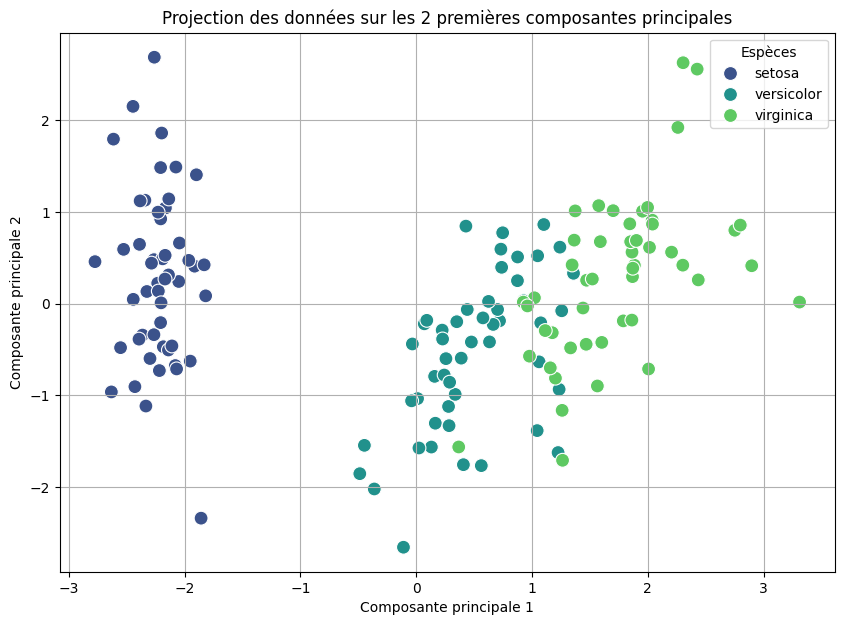

In [28]:
# Visualisation 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='viridis', s=100)
plt.title("Projection des données sur les 2 premières composantes principales")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='Espèces')
plt.grid(True)
plt.show()

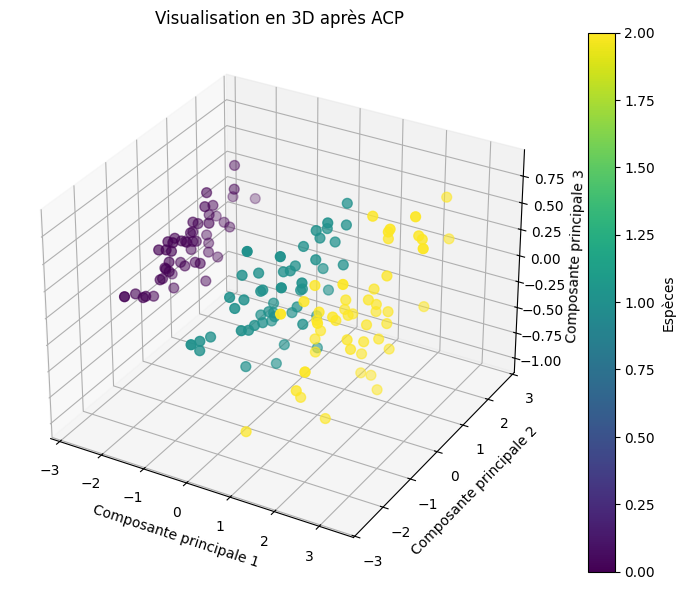

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Réduction à 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Création du plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y, cmap='viridis', s=50)

# Ajouter les étiquettes
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
plt.title('Visualisation en 3D après ACP')
plt.colorbar(scatter, ax=ax, label='Espèces')
plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942


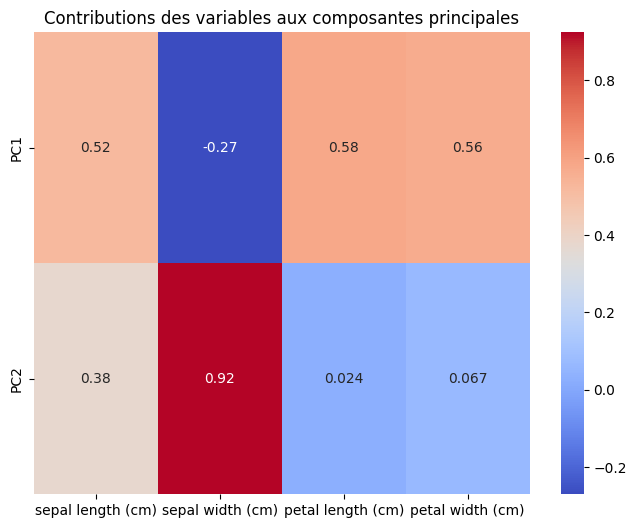

In [30]:
# Contribution des variables aux composantes principales
pca_components = pd.DataFrame(pca.components_, columns=iris.feature_names, index=['PC1', 'PC2'])
print(pca_components)

# Heatmap des contributions
plt.figure(figsize=(8, 6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', cbar=True)
plt.title("Contributions des variables aux composantes principales")
plt.show()

En résumé
L'ACP est un outil puissant pour préparer les données en vue de l'entraînement de modèles de machine learning. Elle permet de réduire la dimensionnalité, de mettre en évidence les relations entre les variables et d'améliorer la qualité des résultats.

En combinant l'ACP avec des techniques de machine learning, vous pouvez obtenir des modèles plus performants et plus interprétables.

Avez-vous d'autres questions sur l'utilisation de l'ACP dans le cadre de l'apprentissage automatique ?

Je peux vous aider à approfondir certains aspects, comme le choix du nombre de composantes, l'interprétation des résultats ou la comparaison avec d'autres méthodes de réduction de dimensionnalité.

Exemple concret avec votre graphique
Dans votre exemple, après avoir obtenu les composantes principales, vous pourriez :

Entraîner un modèle de classification pour prédire l'espèce d'une fleur en utilisant les valeurs des deux premières composantes principales comme entrées.
Utiliser les composantes principales comme features dans un modèle de réseau de neurones pour une tâche de classification plus complexe.
Visualiser les résultats de l'apprentissage en projetant les prédictions du modèle sur le graphique de l'ACP pour vérifier si les frontières de décision sont cohérentes avec la séparation des classes observée.

## EXEMPLE DE L'UTILISATION DE ACP AVEC DU MACHINE LEARNINg

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
"""'arger les données (exemple avec un fichier CSV)
data = pd.read_csv("mon_jeu_de_donnees.csv")

# Séparer les variables explicatives et la variable cible
X = data.drop("target", axis=1)  # Supposons que "target" est la variable à prédire
y = data["target"]"""

# Standardiserles données (indispensable pour l'ACP) C A D  NORAMIL2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'ACP
pca = PCA(n_components=2)  # Conserver les 2 premières composantes principales
X_pca = pca.fit_transform(X_scaled)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# Entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluer le modèle
score = model.score(X_test, y_test)
print("Score R²:", score)

Score R²: 0.897089392684308


[0.72962445 0.22850762 0.03668922 0.00517871]


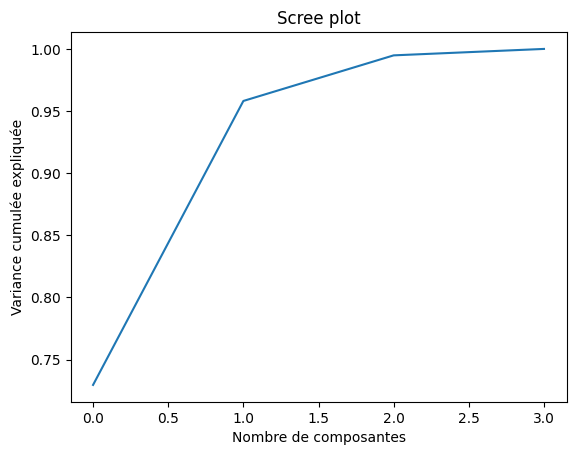

In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger les données (exemple avec le dataset Iris)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réalisation de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Expliquer la variance cumulée
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Scree plot
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée')
plt.title('Scree plot')
plt.show()

In [ ]:
# pour la détection des valeurs aberantes

Q1 = df['variable'].quantile(0.25)
Q3 = df['variable'].quantile(0.75)
IQR = Q3 -Q1
coef = IQR*1.5  
# calcule des valeurs limites

lim_inf = Q1-coef
lim_sup = Q3-coef
# recherche des valerus manquantes 

result = df[df["variable"]>lim_sup | df['variable']< lim_inf]

# rétiration des valeurs manquantes 

df = df[df['variable'] <= lim_sup & df['variable'] >= lim_inf]